In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set()

In [2]:
def show_matrix(M, r=2):
    M = [[str(round(j,r)) for j in i] for i in M]
    for i in M:
        print("\t".join(list(i)))
        
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [93]:
N = 1000
L = 50

X0 = [[random.random()*10, random.random()*4 + 6] for i in range(np.int32(L/2))]
X0 += [[random.random()*10, random.random()*4] for i in range(np.int32(L/2))]
Y0 = [0 for i in range(np.int32(L/2))]
Y0 += [1 for i in range(np.int32(L/2))]
Y0 = np.array(Y0)

## Generate X Data
X1 = [[random.random()*10, random.random()*4 + 6] for i in range(np.int32(N/2))] #--> i = 1~500
X1 += [[random.random()*10, random.random()*4] for i in range(np.int32(N/2))]#--> i = 501~1000

In [108]:
X = np.array(X0 + X1)
labeled_i = [i for i in range(len(X0))]
sigma = 1

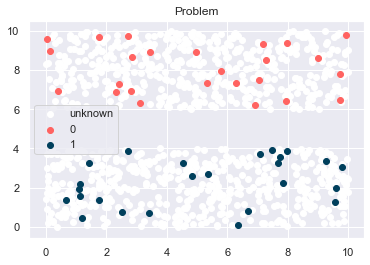

In [109]:
colors = ["#ffffff", "#ff6361", "#003f5c"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots()

ax.scatter([a[0] for a in X],[a[1] for a in X], label="unknown")
ax.scatter([X[i][0] for i in labeled_i[:np.int32(L/2)]],[X[i][1] for i in labeled_i[:np.int32(L/2)]], label="0")
ax.scatter([X[i][0] for i in labeled_i[np.int32(L/2):]],[X[i][1] for i in labeled_i[np.int32(L/2):]], label="1")

ax.legend()
plt.title("Problem")
plt.show()

In [110]:
## VARIABLE HELPER
yl_temp = dict(zip(labeled_i, Y0))
xl = np.array([x for i,x in enumerate(X) if i in labeled_i])
xu = np.array([x for i,x in enumerate(X) if not(i in labeled_i)])

## Create Matrix W
def weight_func(xi, xj, sigm):
    xixj = xi - xj
    xixj2 = np.dot(xixj, xixj)
    return np.float16(np.exp(-(xixj2)/(sigm**2)))

W = []
for i,x in enumerate(X):
    w = [weight_func(X[i], X[j], sigma) for j in range(len(X))]
    W.append(w)
W = np.array(W)

## Matrix A' (ΔU)
A_ = []
for i,x in enumerate(X):
    a = [W[i][j] if i!=j else -np.sum(W[i]) for j in range(len(X))]
    A_.append(a)
A_ = np.array(A_)

## Matrix A
A = []
for i,x in enumerate(X):
    if i in labeled_i:
        a = [1 if j==i else 0 for j in range(len(X))]
    else:
        a = [x for x in A_[i]]
    A.append(a)
A = np.array(A)

## Create b
b = np.array([0 if i not in labeled_i else yl_temp[i] for i,x in enumerate(X)]).T

## Gauss Siedel Method

In [111]:
import time

In [112]:
%time
def gs_method(A,b,x=None, max_i=1000):
    n = len(b)
    if not x:
        x = np.ones(n)
    r0 = np.dot(x,x)
    for it in range(max_i):
        for i in range(n):
            sig = 0
            for j in range(n):
                if j != i:
                    sig += A[i][j]*x[j]
            x[i] = (1/A[i][i])*(b[i] - sig)
        r1 = np.dot(x,x)
        err = abs(r0 - r1)
        r0 = r1
        if err < 1e-9:
            print("iteration ", it)
            return x
        
U = gs_method(A, b)
Y = np.array([1 if u>0.2 else 0 for u in list(U)])

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 14.1 µs
iteration  170


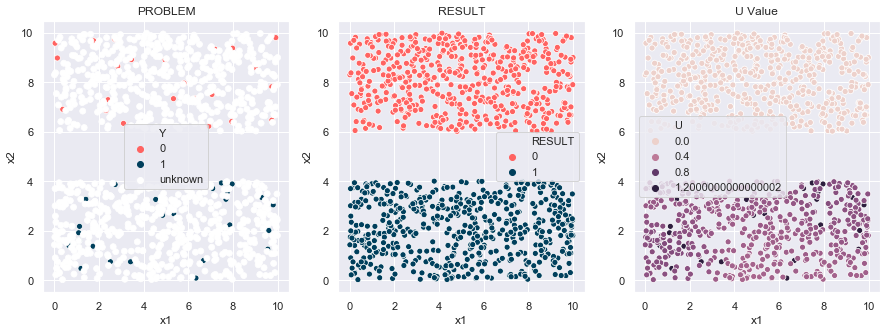

In [129]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(131)

# Create an array with the colors you want to use
colors = ["#ff6361", "#003f5c","#ffffff"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

df = pd.DataFrame(X, columns=["x1","x2"])
df.loc[:, "Y"] = ["unknown" if i not in labeled_i else yl_temp[i] for i,x in enumerate(X)]
ax1 = sns.scatterplot(data=df, x="x1", y="x2", hue="Y", ax=ax1)
ax1.set_title("PROBLEM")

ax2 = plt.subplot(132)
# Create an array with the colors you want to use
colors = ["#ff6361", "#003f5c"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
df = pd.DataFrame(X, columns=["x1","x2"])
df.loc[:, "RESULT"] = Y
sns.scatterplot(data=df, x="x1", y="x2", hue="RESULT", ax=ax2)
ax2.set_title("RESULT")

ax3 = plt.subplot(133)
# Create an array with the colors you want to use
colors = ["#ff6361", "#003f5c"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
df = pd.DataFrame(X, columns=["x1","x2"])
df.loc[:, "U"] = np.round(U,2)
df["U"] = round(df["U"],2)
sns.scatterplot(data=df, x="x1", y="x2", hue="U", ax=ax3, legend="brief")
ax3.set_title("U Value")

plt.show()

#plt.title("Known Label = 50 | N = 1000")
plt.show()

In [1]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

NameError: name 'make_classification' is not defined